(256, 256)
Log-Polar L2 Error: 5832.414851500192


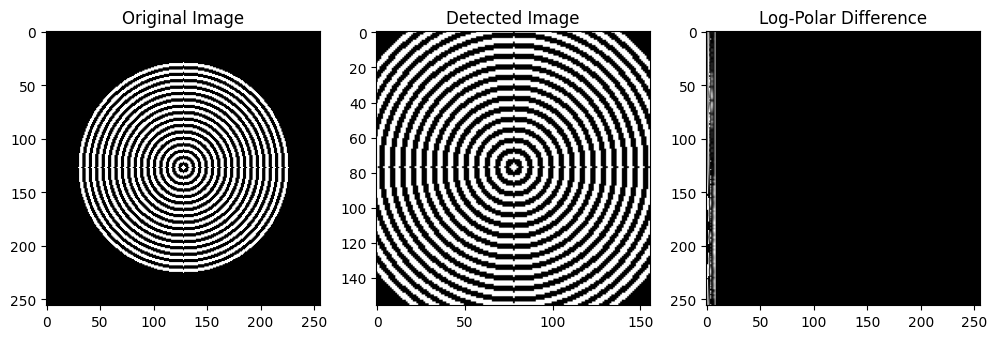

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def log_polar_transform(image, center=None, M=None):
    """
    Applies the log-polar transform to an image.
    Args:
        image: Input image.
        center: Center of the log-polar transform.
        M: Magnification factor for the log-polar transform.
    Returns:
        Transformed image in log-polar coordinates.
    """
    if center is None:
        center = (image.shape[1] // 2, image.shape[0] // 2)
    if M is None:
        M = 1  # Magnification factor (tune this parameter if necessary)
    
    # Perform the log-polar transform
    log_polar_image = cv2.logPolar(
        image, center, M, cv2.INTER_LINEAR + cv2.WARP_FILL_OUTLIERS
    )
    return log_polar_image

def compute_log_polar_error(original, detected):
    """
    Computes the error between the log-polar transformed images.
    Args:
        original: Original watermark image (full).
        detected: Detected watermark image (cropped).
    Returns:
        Error value (L2 loss).
    """
    # Convert images to grayscale if needed
    if len(original.shape) == 3:
        original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    if len(detected.shape) == 3:
        detected = cv2.cvtColor(detected, cv2.COLOR_BGR2GRAY)
    
    # Step 1: Apply log-polar transform
    center_original = (original.shape[1] // 2, original.shape[0] // 2)
    center_detected = (detected.shape[1] // 2, detected.shape[0] // 2)

    log_polar_original = log_polar_transform(original, center=center_original)
    log_polar_detected = log_polar_transform(detected, center=center_detected)

    # Step 2: Resize the detected log-polar image to match the original
    log_polar_detected_resized = cv2.resize(
        log_polar_detected, (log_polar_original.shape[1], log_polar_original.shape[0])
    )

    # Step 3: Compute the L2 error (overlapping part)
    error = np.linalg.norm(log_polar_original - log_polar_detected_resized)

    return error, log_polar_original, log_polar_detected_resized

# Load the images
original_path = "/Users/navtegh/Documents/Watermarking-diffusion-models/original watermark.png"
detected_path = "/Users/navtegh/Documents/Watermarking-diffusion-models/detected watermark.png"

original_image = cv2.imread(original_path, cv2.IMREAD_GRAYSCALE)
print(original_image.shape)
detected_image = cv2.imread(detected_path, cv2.IMREAD_GRAYSCALE)

# Compute the log-polar error
error, log_polar_original, log_polar_detected_resized = compute_log_polar_error(
    original_image, detected_image
)

# Display Results
print(f"Log-Polar L2 Error: {error}")

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(original_image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Detected Image")
plt.imshow(detected_image, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Log-Polar Difference")
plt.imshow(np.abs(log_polar_original - log_polar_detected_resized), cmap='gray')

plt.tight_layout()
plt.show()


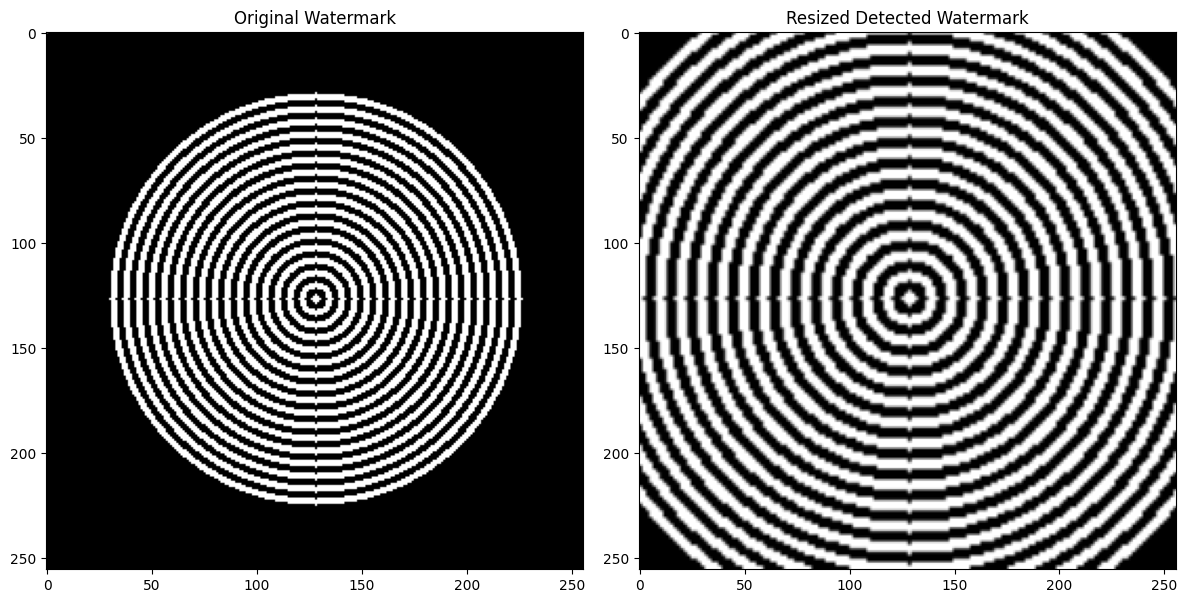

True

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the images
original_path = "/Users/navtegh/Documents/Watermarking-diffusion-models/original watermark.png"
detected_path = "/Users/navtegh/Documents/Watermarking-diffusion-models/detected watermark.png"

original_image = cv2.imread(original_path, cv2.IMREAD_GRAYSCALE)
detected_image = cv2.imread(detected_path, cv2.IMREAD_GRAYSCALE)

# Resize the detected watermark to match the original watermark size
resized_detected_image = cv2.resize(
    detected_image, 
    (original_image.shape[1], original_image.shape[0]),  # Target size (width, height)
    interpolation=cv2.INTER_LINEAR  # Interpolation method
)

# Display both images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Watermark")
plt.imshow(original_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Resized Detected Watermark")
plt.imshow(resized_detected_image, cmap='gray')

plt.tight_layout()
plt.show()

# Save the resized image (optional)
cv2.imwrite("resized_detected_watermark.png", resized_detected_image)


Log-Polar Error with M=0.0001: 4080.0


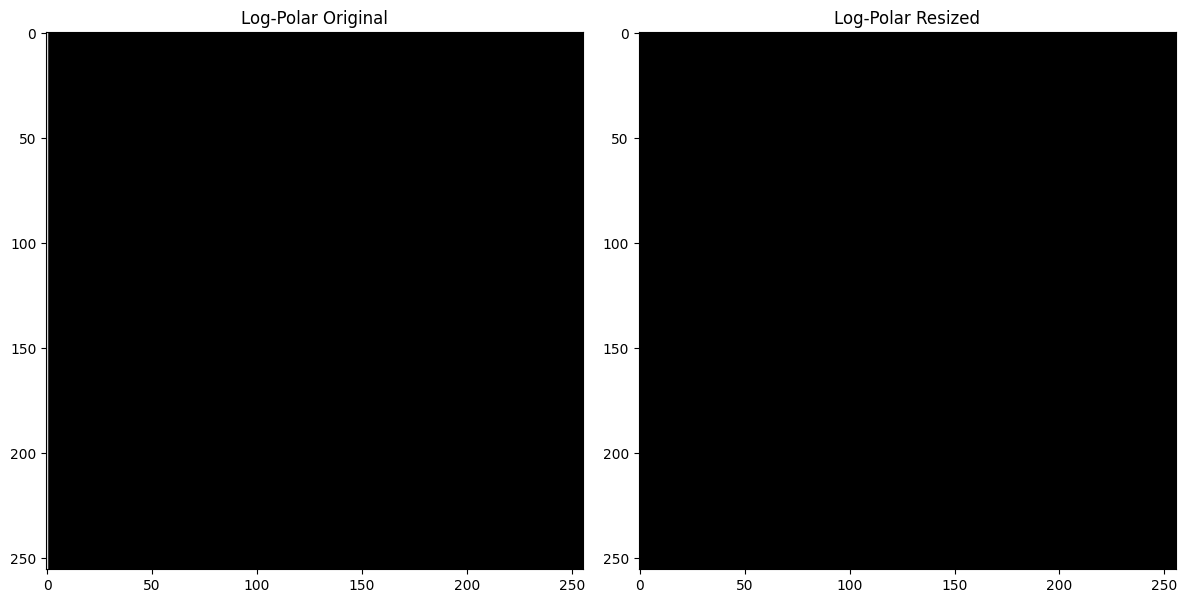

In [22]:
import cv2
import numpy as np
from scipy.signal import correlate2d
from matplotlib import pyplot as plt

def log_polar_transform(image, center=None, M=5):
    """
    Applies the log-polar transform to an image.
    Args:
        image: Input image.
        center: Center of the log-polar transform.
        M: Magnification factor for the log-polar transform.
    Returns:
        Transformed image in log-polar coordinates.
    """
    if center is None:
        center = (image.shape[1] // 2, image.shape[0] // 2)
    
    log_polar_image = cv2.logPolar(
        image, center, M, cv2.INTER_LINEAR + cv2.WARP_FILL_OUTLIERS
    )
    return log_polar_image

def compute_resized_log_polar_error(original, resized, M=30):
    """
    Computes error between log-polar transformed images, handling resizing.
    Args:
        original: Original watermark image.
        resized: Resized watermark image.
        M: Magnification factor for radial resolution.
    Returns:
        Error value and log-polar images.
    """
    # Step 1: Apply log-polar transform with same center and magnification
    center = (original.shape[1] // 2, original.shape[0] // 2)  # Consistent center
    log_polar_original = log_polar_transform(original, center=center, M=M)
    log_polar_resized = log_polar_transform(resized, center=center, M=M)
    
    # Step 2: Compute the L2 error
    error = np.linalg.norm(log_polar_original - log_polar_resized)
    
    return error, log_polar_original, log_polar_resized

# Load images
original_path = "/Users/navtegh/Documents/Watermarking-diffusion-models/original watermark.png"
resized_path = "/Users/navtegh/Documents/Watermarking-diffusion-models/resized_detected_watermark.png"

original_image = cv2.imread(original_path, cv2.IMREAD_GRAYSCALE)
resized_image = cv2.imread(resized_path, cv2.IMREAD_GRAYSCALE)

# Set magnification factor
magnification = 0.0001  # Adjust for higher resolution

# Compute error
error, log_polar_original, log_polar_resized = compute_resized_log_polar_error(
    original_image, resized_image, M=magnification
)

# Display results
print(f"Log-Polar Error with M={magnification}: {error}")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Log-Polar Original")
plt.imshow(log_polar_original, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Log-Polar Resized")
plt.imshow(log_polar_resized, cmap='gray')

plt.tight_layout()
plt.show()


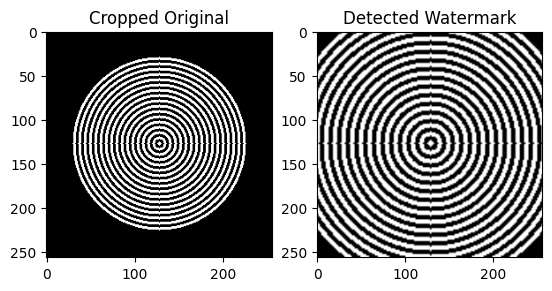

In [15]:
# Extract overlapping region from original image
crop_size = resized_detected_image.shape  # (height, width)
x_start = (original_image.shape[1] - crop_size[1]) // 2
y_start = (original_image.shape[0] - crop_size[0]) // 2

cropped_original = original_image[y_start:y_start + crop_size[0],
                                  x_start:x_start + crop_size[1]]

plt.subplot(1, 2, 1)
plt.title("Cropped Original")
plt.imshow(cropped_original, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Detected Watermark")
plt.imshow(resized_detected_image, cmap='gray')

plt.show()


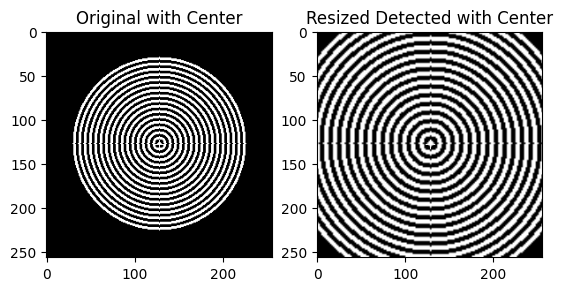

In [16]:
def draw_center(image, center_color=255):
    """Draw a small cross at the center of the image."""
    center = (image.shape[1] // 2, image.shape[0] // 2)
    image_with_center = image.copy()
    cv2.line(image_with_center, (center[0] - 5, center[1]), (center[0] + 5, center[1]), center_color, 1)
    cv2.line(image_with_center, (center[0], center[1] - 5), (center[0], center[1] + 5), center_color, 1)
    return image_with_center

# Draw centers
original_with_center = draw_center(original_image)
resized_with_center = draw_center(resized_detected_image)

plt.subplot(1, 2, 1)
plt.title("Original with Center")
plt.imshow(original_with_center, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Resized Detected with Center")
plt.imshow(resized_with_center, cmap='gray')

plt.show()
